In [1]:
import sys
import os

sys.path.append('/Users/jordanlee/Projects/SummerProject/ParticleSwarm/PSO_Final')

import numpy as np
import pso as pso
import pickle
import time
import subprocess
import random
import scipy.constants as con

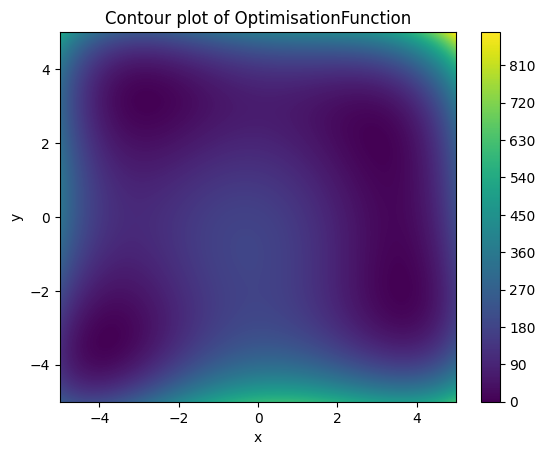

Minimum value of Z_mesh: 0.0
Corresponding x value: 3.0
Corresponding y value: 2.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def OptimisationFunction(X):
    x = X[:, 0]
    y = X[:, 1]
    if x.any() <= -5 or x.any() >= 5:
        raise RuntimeError('Trying to sample function outside of bounds.')
    
    else:
        return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

# Define grid for x and y
x_test = np.linspace(-5, 5, 101, endpoint=True)  # Extended range to see more variation
y_test = np.linspace(-5, 5, 101, endpoint=True)

# Create meshgrid
X_mesh, Y_mesh = np.meshgrid(x_test, y_test)

# Flatten the grid arrays and combine into a list of coordinates
X_flat = np.vstack([X_mesh.ravel(), Y_mesh.ravel()]).T

# Evaluate the function on the grid
Z = OptimisationFunction(X_flat)

# Reshape the result back into the shape of the meshgrid
Z_mesh = Z.reshape(X_mesh.shape)

# Plot the contour
plt.contourf(X_mesh, Y_mesh, Z_mesh, levels=500, cmap="viridis")
plt.colorbar()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Contour plot of OptimisationFunction")
plt.show()

# Step 2: Find the index of the minimum value in the Z_mesh array
min_index = np.argmin(Z_mesh)

# Step 3: Convert the flattened index back to 2D index
min_index_2d = np.unravel_index(min_index, Z_mesh.shape)

# Get the corresponding x and y values
min_x = X_mesh[min_index_2d]
min_y = Y_mesh[min_index_2d]
min_value = Z_mesh[min_index_2d]

# Print results
print(f"Minimum value of Z_mesh: {min_value}")
print(f"Corresponding x value: {min_x}")
print(f"Corresponding y value: {min_y}")

In [3]:
number_of_particles = 1
dimension = 2
bounds = [[-5, 5] for _ in range(dimension)]
maximise = False
initial_velocity = 1.8 * np.max(np.array(bounds)[:, 1] - np.array(bounds)[:, 0])

iteration=0
use_adaptive_hyper_parameters = False

def LocalWeightFunction (iteration):
    return

def GlobalWeightFunction (iteration):
    return 

def InertialWeightFunction (iteration):
    return

use_adaptive_boxes = True
use_species = True
species_weights = [0., 1., 0., 0., 0.]
species_ids = [0, 1, 2, 3, 4] 

use_boxes_cutoff = 1
box_reduction_factor = 0.8

def BoxWidthFunction(iteration):
    if iteration < use_boxes_cutoff:
        return (box_reduction_factor**(iteration))*(bounds[0][1] - bounds[0][0])
    else:
        use_adaptive_boxes = False
        return 0.0001

def SampleSizeFunction(iteration):
    if iteration < use_boxes_cutoff:
        return 4
    else:
        return 1

In [4]:
use_explosive_global_parameter = False

optimiser = pso.Pso(dimension, number_of_particles, bounds, OptimisationFunction, 
                maximise, use_adaptive_hyper_parameters, GlobalWeightFunction,
                LocalWeightFunction, InertialWeightFunction, use_adaptive_boxes,
                use_species, species_weights, BoxWidthFunction, SampleSizeFunction,
                use_explosive_global_parameter, log_file="/Users/jordanlee/Projects/SummerProject/ParticleSwarm/PSO_Final/Examples/log.txt")

In [5]:
optimiser.Iterate(100)

for particle in optimiser.swarm.particles:
    print(particle.position_history, particle.velocity_history)

2024-10-15 16:16:42,050 - INFO - Log file successfully setup.
2024-10-15 16:16:42,051 - INFO - Initializing the SWARM with the following parameters:
2024-10-15 16:16:42,052 - INFO - dimension = 2
2024-10-15 16:16:42,055 - INFO - bounds = [[-5, 5], [-5, 5]]
2024-10-15 16:16:42,057 - INFO - number of particles = 1
2024-10-15 16:16:42,060 - INFO - swarm will MINIMIZE the function
2024-10-15 16:16:42,063 - INFO - swarm is using multiple species
2024-10-15 16:16:42,063 - INFO - swarm is using adaptive boxes
2024-10-15 16:16:42,079 - INFO - Particle positions initialized
2024-10-15 16:16:42,079 - INFO - Particle velocities initialized
2024-10-15 16:16:42,079 - INFO - Swarm object initialized
2024-10-15 16:16:42,080 - INFO - Generated all boxes for particles in the swarm.
2024-10-15 16:16:42,080 - INFO - Populated all boxes with sample points for particles in the swarm.
2024-10-15 16:16:42,081 - INFO - y_values : [array([124.69005532, 344.13458542,  77.77307421, 176.25616232])]
2024-10-15 16:

Speices ID: 1


2024-10-15 16:16:42,264 - INFO - y_values : [array([13.33122447])]
2024-10-15 16:16:42,265 - INFO - Local Maxima updated
2024-10-15 16:16:42,266 - INFO - Global Maxima Updated
2024-10-15 16:16:42,301 - INFO - Particles Ranked
2024-10-15 16:16:42,314 - INFO - Sample Point History Written
2024-10-15 16:16:42,328 - INFO - Found adventure leads
2024-10-15 16:16:42,328 - INFO - Adventure Leads Assigned
2024-10-15 16:16:42,329 - INFO - Optimum Predicted
2024-10-15 16:16:42,329 - INFO - Velocity Updated
2024-10-15 16:16:42,330 - INFO - Position Updated
2024-10-15 16:16:42,330 - INFO - Generated all boxes for particles in the swarm.
2024-10-15 16:16:42,331 - INFO - Populated all boxes with sample points for particles in the swarm.
2024-10-15 16:16:42,331 - INFO - y_values : [array([135.73716695])]
2024-10-15 16:16:42,332 - INFO - Local Maxima updated
2024-10-15 16:16:42,333 - INFO - Global Maxima Updated
2024-10-15 16:16:42,333 - INFO - Particles Ranked
2024-10-15 16:16:42,334 - INFO - Sample 

[array([ 4.7231822 , -2.63168803]), array([3.36613213, 0.04156105]), array([1.83756649, 4.03055022]), array([ 1.22612315, -2.30736611]), array([ 1.59295496, -3.56186201]), array([2.59567419, 1.18411504]), array([3.70601565, 4.5238654 ]), array([4.45831831, 4.59726573]), array([4.62326887, 2.07187908]), array([ 4.25235753, -0.76056713]), array([ 3.6011212, -2.7056825]), array([ 2.98611941, -3.16288706]), array([1.69322369, 1.19512007]), array([ 2.13220116, -0.88868629]), array([-2.31390367, -2.18364213]), array([-3.59879031, -2.3295352 ]), array([-1.84074774, -1.49782084]), array([ 1.64842116, -0.21670627]), array([4.87317642, 0.91148263]), array([1.48761968, 1.46605544]), array([-0.46943783,  1.33990626]), array([-0.50087295,  0.71963915]), array([ 1.02076389, -0.04781546]), array([ 3.17620356, -0.62603822]), array([ 3.91885133, -4.23602702]), array([-2.26636958,  4.4001888 ]), array([-3.17927477,  4.53025713]), array([-2.57963106,  0.97398465]), array([ 0.27837209, -2.99560104]), arra

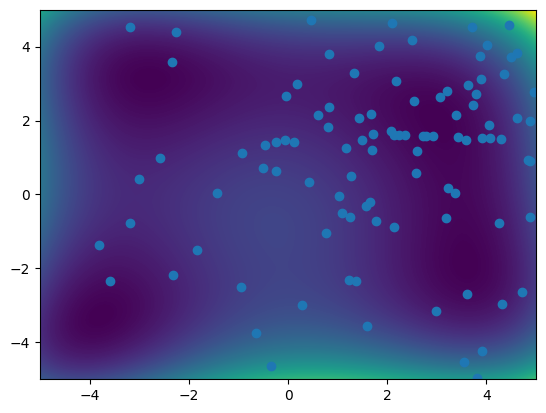

In [17]:
plt.contourf(X_mesh, Y_mesh, Z_mesh, levels=500, cmap="viridis")

for i, particle in enumerate(optimiser.swarm.particles):
    if particle.species == 2:
        marker = 'D'
    else: 
        marker = 'o'
    plt.scatter(np.array(particle.position_history)[:,0], np.array(particle.position_history)[:,1], color=f'C{i}', marker=marker)

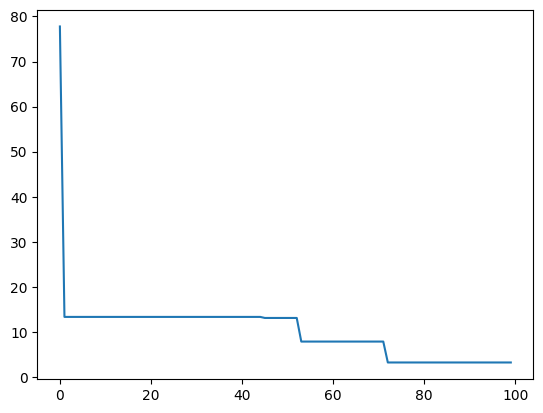

In [8]:
gmax_history = optimiser.swarm.global_max_history
plt.plot(gmax_history)

In [9]:
particle.velocity_history
magnitude_history = np.sqrt(np.sum(np.square(particle.velocity_history), axis=1))
magnitude_history, optimiser.vthresh

(array([ 7.65225051,  6.1217953 ,  6.36734218,  4.14702808,  4.85074675,
         3.51948727,  1.15687933,  2.53076795,  2.85662856,  2.05123928,
         0.766331  ,  4.54574587,  6.51671905,  4.6308486 ,  1.29314286,
         1.94485538,  3.71692806,  3.65678733,  3.43067712,  1.961119  ,
         0.62106317,  1.70421984,  2.23165   ,  3.68558609, 10.62267298,
         0.92212454,  4.53557213,  4.89139986,  4.03059264,  2.67850968,
         3.08477428,  2.85889379,  2.07932803,  1.51746171,  1.68627729,
         1.83719501,  1.56700722,  5.90380236,  8.03110343,  5.95880487,
         4.77760365,  3.24118095,  3.03047846,  3.54837798,  3.38550853,
         2.70840367,  1.08335832,  0.65002129,  1.77671646,  1.96738601,
         1.33296725,  1.35537943,  1.16766217,  0.93411609,  0.93411609,
         0.93411609,  0.93411609,  0.74730652,  1.79352199,  1.91308558,
         1.24350221,  1.24350221,  6.96954674,  2.8591636 ,  3.00800682,
         1.9386866 ,  2.13915612,  1.71475166,  1.0

In [10]:
particle.velocity_threshold

0.13404737175763923

In [11]:
magnitude_history[0] / np.e**3

0.38098311908444277

In [12]:
optimiser.swarm.vthresh

0.04978706836786395

In [13]:
2 * np.e**2

14.778112197861299

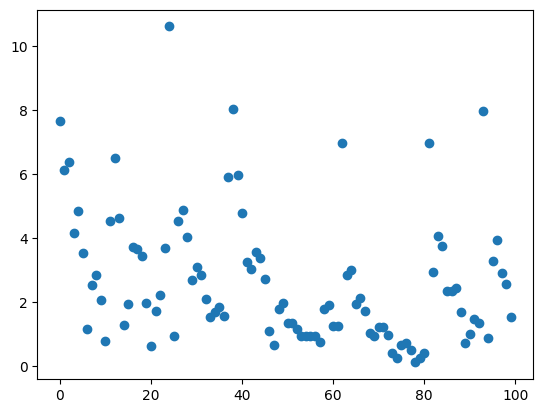

In [14]:
for particle in optimiser.swarm.particles:
    if particle.species == 2:
        pass
    else:
        velocity_magnitude = np.sqrt(np.sum(np.square(particle.velocity_history), axis=1))
        plt.scatter(range(len(velocity_magnitude)), velocity_magnitude)